In [0]:
#!pip install emoji --upgrade
#!pip install emoji

#!pip install WordCloud

In [0]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 


import collections
import string
import emoji
import nltk
import re


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords


In [0]:
#nltk.download()


In [0]:
df = pd.read_csv('train.csv', low_memory=False)
df_text = pd.read_csv('test_nolabel.csv', low_memory=False)

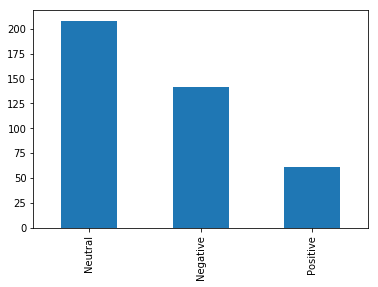

In [227]:
df['polarity'].value_counts().plot.bar();

In [0]:
class TextCounts(BaseEstimator, TransformerMixin):
    
    def count_regex(self, pattern, tweet):
        return len(re.findall(pattern, tweet))
    
    def fit(self, X, y=None, **fit_params):
        # fit method is used when specific operations need to be done on the train data, but not on the test data
        return self
    
    def transform(self, X, **transform_params):
        count_words = X.apply(lambda x: self.count_regex(r'\w+', x)) 
        count_mentions = X.apply(lambda x: self.count_regex(r'@\w+', x))
        count_hashtags = X.apply(lambda x: self.count_regex(r'#\w+', x))
        count_capital_words = X.apply(lambda x: self.count_regex(r'\b[A-Z]{2,}\b', x))
        count_excl_quest_marks = X.apply(lambda x: self.count_regex(r'!|\?', x))
        count_urls = X.apply(lambda x: self.count_regex(r'http.?://[^\s]+[\s]?', x))
        # We will replace the emoji symbols with a description, which makes using a regex for counting easier
        # Moreover, it will result in having more words in the tweet
        count_emojis = X.apply(lambda x: emoji.demojize(x)).apply(lambda x: self.count_regex(r':[a-z_&]+:', x))
        
        df = pd.DataFrame({'count_words': count_words
                           , 'count_mentions': count_mentions
                           , 'count_hashtags': count_hashtags
                           , 'count_capital_words': count_capital_words
                           , 'count_excl_quest_marks': count_excl_quest_marks
                           , 'count_urls': count_urls
                           , 'count_emojis': count_emojis
                          })
        
        return df
tc = TextCounts()


In [0]:
df_eda = tc.fit_transform(df.text)
df_eda['polarity'] = df.polarity

In [0]:
def show_dist(df, col):
    print('Descriptive stats for {}'.format(col))
    print('-'*(len(col)+22))
    print(df.groupby('polarity')[col].describe())
    bins = np.arange(df[col].min(), df[col].max() + 1)
    g = sns.FacetGrid(df, col='polarity', size=5, hue='polarity', palette="PuBuGn_d")
    g = g.map(sns.distplot, col, kde=False, norm_hist=True, bins=bins)
    plt.show()

Descriptive stats for count_words
---------------------------------
          count       mean        std  min   25%   50%    75%   max
polarity                                                           
Negative  142.0  31.281690  14.283535  2.0  19.0  29.0  43.75  61.0
Neutral   208.0  25.562500  14.450847  2.0  16.0  22.0  34.00  63.0
Positive   61.0  25.672131  12.056425  5.0  17.0  22.0  33.00  52.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


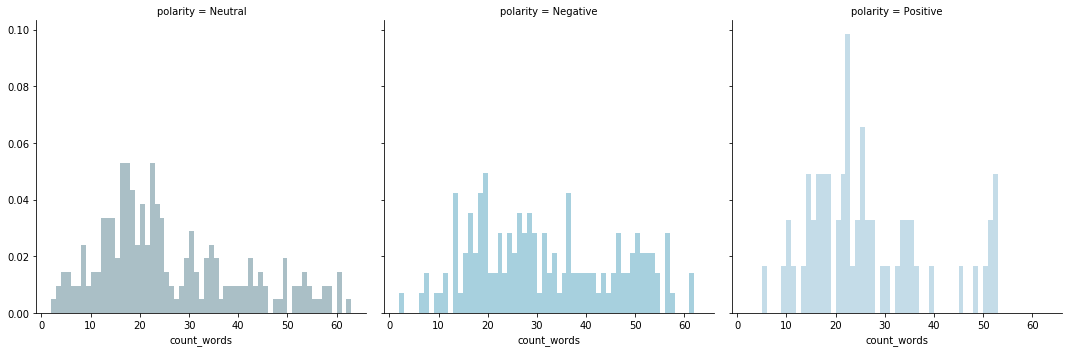

In [231]:
show_dist(df_eda, 'count_words')

Descriptive stats for count_mentions
------------------------------------
          count      mean       std  min  25%  50%  75%  max
polarity                                                    
Negative  142.0  1.415493  1.479136  0.0  1.0  1.0  2.0  9.0
Neutral   208.0  1.062500  1.247582  0.0  0.0  1.0  2.0  7.0
Positive   61.0  0.836066  1.306144  0.0  0.0  0.0  1.0  8.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


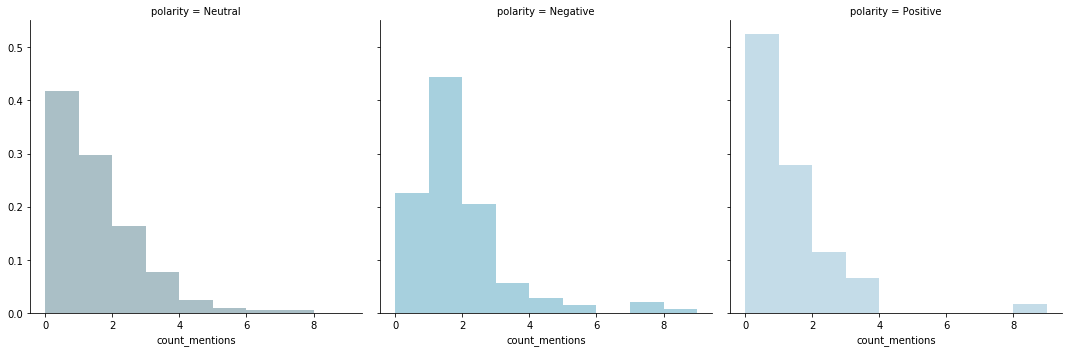

In [232]:
show_dist(df_eda, 'count_mentions')

Descriptive stats for count_hashtags
------------------------------------
          count      mean       std  min  25%  50%  75%   max
polarity                                                     
Negative  142.0  0.176056  0.655574  0.0  0.0  0.0  0.0   4.0
Neutral   208.0  0.543269  1.385938  0.0  0.0  0.0  0.0  12.0
Positive   61.0  0.655738  1.327720  0.0  0.0  0.0  1.0   6.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


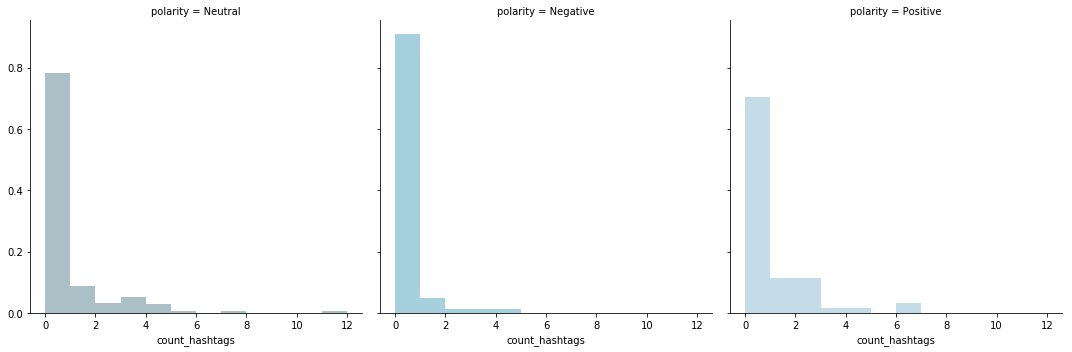

In [233]:
show_dist(df_eda, 'count_hashtags')

Descriptive stats for count_capital_words
-----------------------------------------
          count      mean       std  min  25%  50%   75%   max
polarity                                                      
Negative  142.0  1.133803  5.084016  0.0  0.0  0.0  0.75  40.0
Neutral   208.0  0.524038  1.314872  0.0  0.0  0.0  1.00  14.0
Positive   61.0  0.557377  1.500273  0.0  0.0  0.0  0.00   7.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


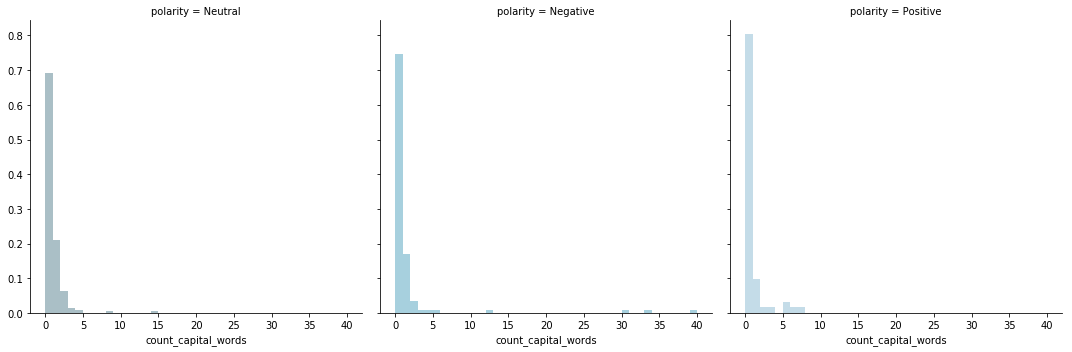

In [234]:
show_dist(df_eda, 'count_capital_words')

Descriptive stats for count_excl_quest_marks
--------------------------------------------
          count      mean       std  min  25%  50%  75%   max
polarity                                                     
Negative  142.0  0.718310  1.489282  0.0  0.0  0.0  1.0  10.0
Neutral   208.0  0.413462  1.031959  0.0  0.0  0.0  0.0   6.0
Positive   61.0  0.459016  0.975940  0.0  0.0  0.0  0.0   4.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


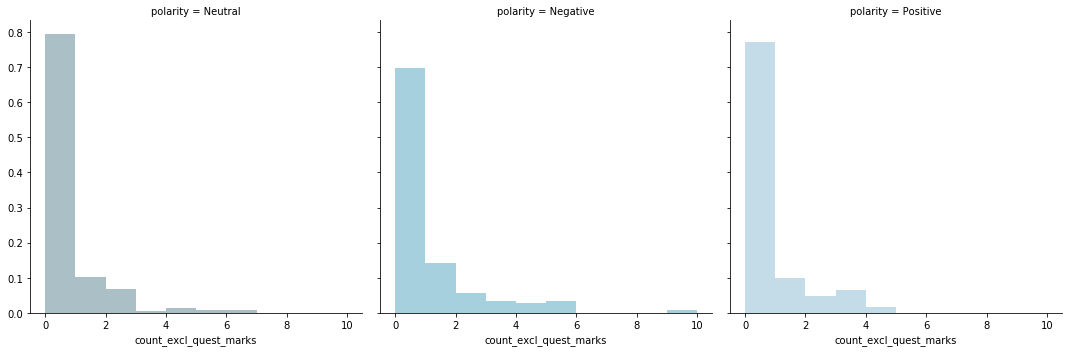

In [235]:
show_dist(df_eda, 'count_excl_quest_marks')

Descriptive stats for count_urls
--------------------------------
          count      mean       std  min  25%  50%  75%  max
polarity                                                    
Negative  142.0  0.176056  0.434330  0.0  0.0  0.0  0.0  2.0
Neutral   208.0  0.552885  0.706828  0.0  0.0  0.0  1.0  2.0
Positive   61.0  0.557377  0.719365  0.0  0.0  0.0  1.0  2.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


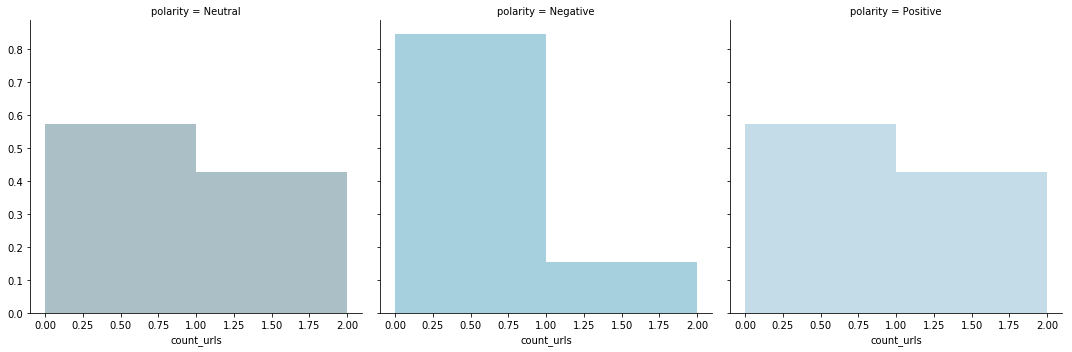

In [236]:
show_dist(df_eda, 'count_urls')

Descriptive stats for count_emojis
----------------------------------
          count      mean       std  min  25%  50%  75%   max
polarity                                                     
Negative  142.0  0.443662  1.475688  0.0  0.0  0.0  0.0  12.0
Neutral   208.0  0.754808  3.187002  0.0  0.0  0.0  0.0  36.0
Positive   61.0  0.737705  1.504456  0.0  0.0  0.0  1.0   7.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


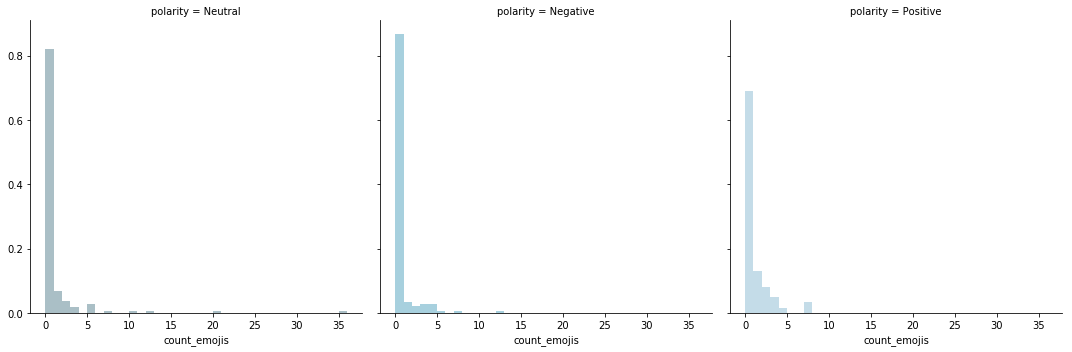

In [237]:
show_dist(df_eda, 'count_emojis')

Positive words


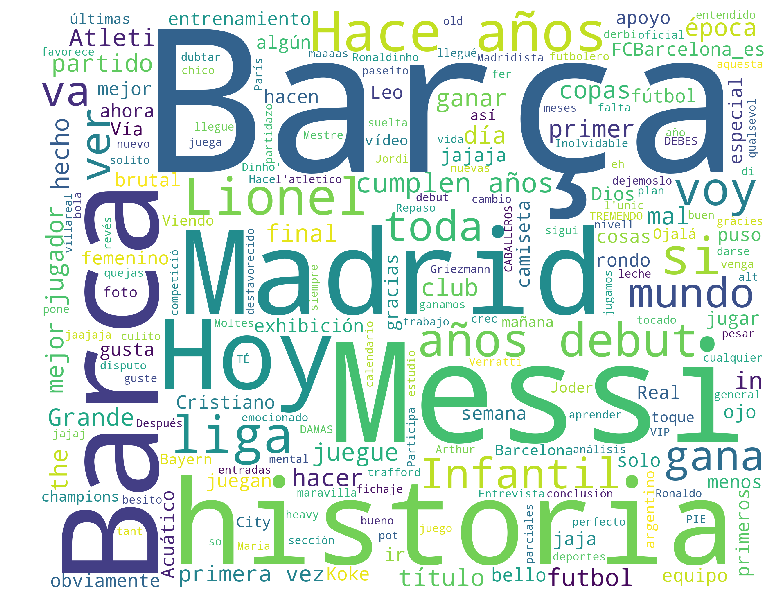

Negative words


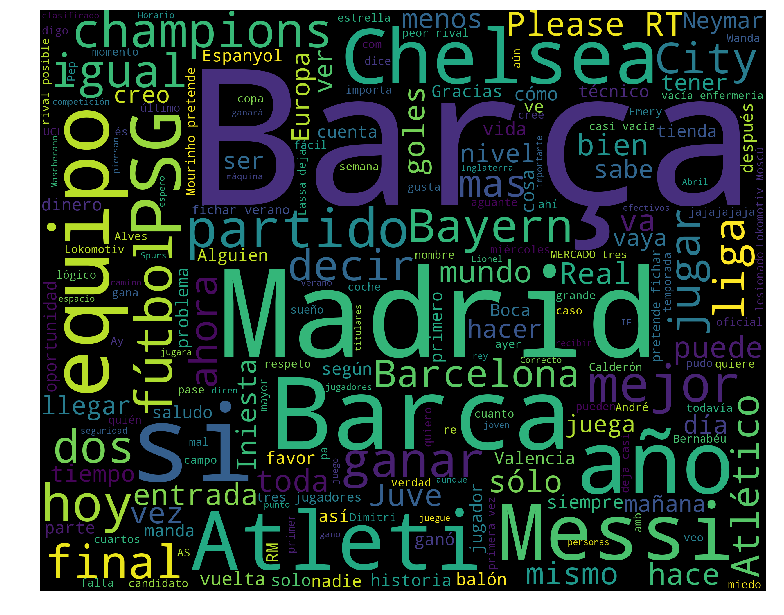

Neutral words


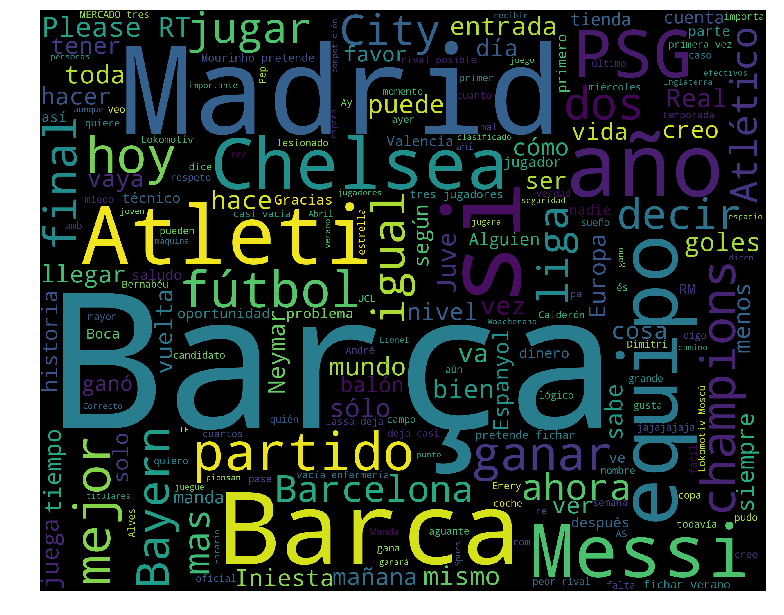

In [238]:
train_pos = df[ df['polarity'] == 'Positive']
train_pos = train_pos['text']
train_neg = df[ df['polarity'] == 'Negative']
train_neg = train_neg['text']
train_neu = df[ df['polarity'] == 'Neutral']
train_neu = train_neu['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=stopwords.words('spanish'),
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neu)
print("Neutral words")
wordcloud_draw(train_neu)

In [0]:
class CleanText(BaseEstimator, TransformerMixin):
   
    def remove_mentions(self, input_text):
        return re.sub(r'@\w+', '', input_text)
    
    def remove_urls(self, input_text):
        return re.sub(r'http.?://[^\s]+[\s]?', '', input_text)
    
    def emoji_oneword(self, input_text):
        # By compressing the underscore, the emoji is kept as one word
        return input_text.replace('_','')
    
    def remove_punctuation(self, input_text):
        # Make translation table
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')  # Every punctuation symbol will be replaced by a space
        return input_text.translate(trantab)

    def remove_digits(self, input_text):
        return re.sub('\d+', '', input_text)
    
    def to_lower(self, input_text):
        return input_text.lower()
    
    def remove_stopwords(self, input_text):
        stopwords_list = stopwords.words('spanish')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["sin", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
    def stemming(self, input_text):
        porter = PorterStemmer()
        words = input_text.split() 
        stemmed_words = [porter.stem(word) for word in words]
        return " ".join(stemmed_words)
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, **transform_params):
        clean_X = X.apply(self.remove_mentions).apply(self.remove_urls).apply(self.emoji_oneword).apply(self.remove_punctuation).apply(self.remove_digits).apply(self.to_lower).apply(self.remove_stopwords).apply(self.stemming)
        return clean_X

In [0]:
df['text1']=df.text.str.replace('http.?://[^\s]+[\s]?', '')
df['text1']=df.text1.apply(emoji.demojize)
df['text1']=df.text1.str.replace('_','')
df['text1']=df.text1.str.replace('-',' ')
df['text1']=df.text1.str.replace(':',' ')
df['text1']=df.text1.str.replace('\n', ' ')
df['text1']=df.text1.str.replace("([?]{2,}).*", " gccuestionar ", regex=True)
df['text1']=df.text1.str.replace('[hja]+[hja]+[hja]', ' jaja ')
df['text1']=df.text1.str.replace(r"(\w)\1{3,}", r"\1", regex=True)
df['text1']=df.text1.str.replace('[?]+', ' interrogar ')
df['text1']=df.text1.str.replace('[!]+', ' exclamar')
df['text1']=df.text1.str.replace('\d+', '')
df['text1']=df.text1.str.replace('barca', 'gcbarca')
df['text1']=df.text1.str.replace('Barca', 'barcagc')
df['text1']=df.text1.str.replace('ç', 'c')
df['text1']=df.text1.str.replace('ñ', 'ni')
df['text1']=df.text1.str.replace('\s+', ' ')

In [0]:
df["text1"]=df.text1.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [0]:
punctuation = list(string.punctuation)
add_punctuation = ["’", "‘"]
add_stopword=['etc','an','ni','pues']
stopwords_list = stopwords.words('spanish')+punctuation+add_punctuation+add_stopword
whitelist = ["sin"]

In [0]:
tt = TweetTokenizer(reduce_len=True, preserve_case=False)
df["words"]=df['text1'].apply(tt.tokenize)
#df['words']=df['words'].apply(lambda x: [item for item in x if item not in stopwords_list])
df['words']=df['words'].apply(lambda x: [item for item in x if (item not in stopwords_list or item in whitelist) and len(item) > 1])

In [0]:
df["clean"]=df.words.str.join(' ')

In [0]:
ct = CleanText()
#sr_clean = ct.fit_transform(df.text)
#df["clean"]=sr_clean
sr_clean=df["clean"]

In [246]:
empty_clean = sr_clean == ''
print('{} records have no words left after text cleaning'.format(sr_clean[empty_clean].count()))
sr_clean.loc[empty_clean] = '[no_text]'

1 records have no words left after text cleaning


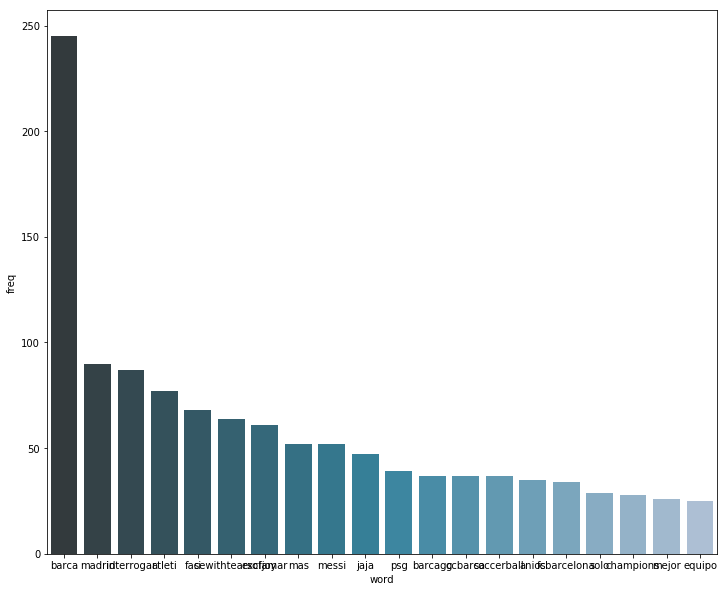

In [247]:
cv = CountVectorizer()
bow = cv.fit_transform(sr_clean)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

In [248]:
df.head(10)

,id,text,polarity,text1,words,clean
0,9f5c7536,Recorriendo el #CampNou🏟 https://t.co/ZKZ1ERaiZS,Neutral,Recorriendo el #CampNou stadium,"[recorriendo, #campnou, stadium]",recorriendo #campnou stadium
1,8e59cbaa,@FCBarcelona fera desde pequeno😲😲,Neutral,@FCBarcelona fera desde pequeno astonishedface...,"[@fcbarcelona, fera, pequeno, astonishedface, ...",@fcbarcelona fera pequeno astonishedface aston...
2,a2c38968,@sport Y el barca que haria sin Messi????? Ni ...,Negative,@sport Y el gcbarca que haria sin Messi gccues...,"[@sport, gcbarca, haria, sin, messi, gccuestio...",@sport gcbarca haria sin messi gccuestionar
3,51cf6477,Please RT!! #barcelona #fcbarcelona #Barca #fc...,Neutral,Please RT exclamar #barcelona #fcbarcelona #ba...,"[please, rt, exclamar, #barcelona, #fcbarcelon...",please rt exclamar #barcelona #fcbarcelona #ba...
4,2a1bb2a5,"@NostradamusFCB Si parce que miedo, sólo el ba...",Neutral,"@NostradamusFCB Si parce que miedo, solo el gc...","[@nostradamusfcb, si, parce, miedo, solo, gcba...",@nostradamusfcb si parce miedo solo gcbarca ci...
5,7c2deb3b,@Matt_Santangelo Mino= No Barca.,Neutral,@MattSantangelo Mino= No barcagc.,"[@mattsantangelo, mino, barcagc]",@mattsantangelo mino barcagc
6,55a8dfe9,Pero cuando dicen que os ganará el Barça acaba...,Neutral,Pero cuando dicen que os ganara el Barca acaba...,"[dicen, ganara, barca, acaba, pasando, .., blu...",dicen ganara barca acaba pasando .. bluecircle...
7,c67c8f81,@RoussGame Te as enterado que an robado en la ...,Negative,@RoussGame Te as enterado que an robado en la ...,"[@roussgame, as, enterado, robado, tienda, atl...",@roussgame as enterado robado tienda atleti cr...
8,5c5d618c,"Qué maravilla que este chico tocado por Dios, ...",Positive,"Que maravilla que este chico tocado por Dios, ...","[maravilla, chico, tocado, dios, juegue, barca...",maravilla chico tocado dios juegue barca excla...
9,1894c5a1,@natxinho @jorgeneo @F_Reymundo totalmente! Aq...,Negative,@natxinho @jorgeneo @FReymundo totalmente excl...,"[@natxinho, @jorgeneo, @freymundo, totalmente,...",@natxinho @jorgeneo @freymundo totalmente excl...


In [0]:
#df["textDemoji"]=df.clean.apply(emoji.demojize).str.replace(':',' ',regex=False)

In [0]:
import pandas as pd
import nltk
import string
import re 

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

from nltk.tokenize import TweetTokenizer

import matplotlib.pyplot as plt
import emoji

In [0]:
#stpword = set(stopwords.words('spanish'))
#punctuation = string.punctuation
#print(punctuation)

In [0]:
#df = pd.read_csv('train.csv', low_memory=False)
df_test = pd.read_csv('test_nolabel.csv', low_memory=False)
#df_test.head()

In [0]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer

# from doc to clean tokens
def clean_doc(doc):
    doc=emoji.demojize(doc)
    doc=doc.replace(':', ' ')
    doc=doc.replace('_', '')
    doc=doc.replace('á', 'a')
    doc=doc.replace('é', 'e')
    doc=doc.replace('í', 'i')
    doc=doc.replace('ó', 'o')
    doc=doc.replace('ú', 'u')
    doc=doc.lower()
    # dividido en tokens por espacio en blanco
    tokens = doc.split()
    # regex for character filter
    re_punc = re.compile('[%s]' % re.escape(punctuation))
    snow = SnowballStemmer('spanish')
    stemmed_words = [snow.stem(w) for w in tokens]
    # filter punctuation
    tokens = [re_punc.sub('', w) for w in tokens]
    tokens = [re.sub(r'@\w+', '', w) for w in tokens]
    tokens = [re.sub(r'http.?://[^\s]+[\s]?', '', w) for w in tokens]
    # delete tokens out of alphabetic order
    tokens = [word for word in tokens if word.isalpha()]
    # filter stopwords
    #stop_words = set(stpword)
    tokens = [w for w in tokens if not w in stpword]
    # filter tokens by size
    tokens = [word for word in tokens if len(word) < 15 and len(word) > 1]
    tokens = ' '.join(tokens)
    return doc

In [254]:
#df["cleaned"]=df["text"].apply(lambda x: clean_doc(x))
df["cleaned"]=df["clean"]
df.head()

,id,text,polarity,text1,words,clean,cleaned
0,9f5c7536,Recorriendo el #CampNou🏟 https://t.co/ZKZ1ERaiZS,Neutral,Recorriendo el #CampNou stadium,"[recorriendo, #campnou, stadium]",recorriendo #campnou stadium,recorriendo #campnou stadium
1,8e59cbaa,@FCBarcelona fera desde pequeno😲😲,Neutral,@FCBarcelona fera desde pequeno astonishedface...,"[@fcbarcelona, fera, pequeno, astonishedface, ...",@fcbarcelona fera pequeno astonishedface aston...,@fcbarcelona fera pequeno astonishedface aston...
2,a2c38968,@sport Y el barca que haria sin Messi????? Ni ...,Negative,@sport Y el gcbarca que haria sin Messi gccues...,"[@sport, gcbarca, haria, sin, messi, gccuestio...",@sport gcbarca haria sin messi gccuestionar,@sport gcbarca haria sin messi gccuestionar
3,51cf6477,Please RT!! #barcelona #fcbarcelona #Barca #fc...,Neutral,Please RT exclamar #barcelona #fcbarcelona #ba...,"[please, rt, exclamar, #barcelona, #fcbarcelon...",please rt exclamar #barcelona #fcbarcelona #ba...,please rt exclamar #barcelona #fcbarcelona #ba...
4,2a1bb2a5,"@NostradamusFCB Si parce que miedo, sólo el ba...",Neutral,"@NostradamusFCB Si parce que miedo, solo el gc...","[@nostradamusfcb, si, parce, miedo, solo, gcba...",@nostradamusfcb si parce miedo solo gcbarca ci...,@nostradamusfcb si parce miedo solo gcbarca ci...


In [0]:
#df_test["cleaned"]=df_test["text"].apply(lambda x: clean_doc(x))
#df_test.head()
df_test["cleaned"]=df["cleaned"]

In [0]:
X = df['cleaned'].values
y = df['polarity'].values

In [257]:
X_test = df_test['cleaned'].values
X_test

array(['recorriendo #campnou stadium',
       '@fcbarcelona fera pequeno astonishedface astonishedface',
       '@sport gcbarca haria sin messi gccuestionar',
       'please rt exclamar #barcelona #fcbarcelona #barcagc #fcb titulares habituales barca piensan ...',
       '@nostradamusfcb si parce miedo solo gcbarca city serian capaces pararlos desgraciados nacieron pa jugar champions',
       '@mattsantangelo mino barcagc',
       'dicen ganara barca acaba pasando .. bluecircle redcircle',
       '@roussgame as enterado robado tienda atleti creo tienda verdad poca vigilancia estadio maniana tener cuidadito visto videos ultras rusos maniana bilbao',
       'maravilla chico tocado dios juegue barca exclamar toda historia hecho leo toda falta exclamar mejor historia exclamar',
       '@natxinho @jorgeneo @freymundo totalmente exclamar aqui solo favores arbitrales barca exclamar asi cutres ... ida hace banio ayer posible',
       '@asmanolete hombre barca espero barca pase momento barca cl

In [258]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(2,shuffle = True, random_state=33)

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X, y)
scores = cross_val_score(nb, X, y, cv=cv)


print("Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

y_pred_MultinomiaNB = nb.predict(X_test)

res = {'id': '','polarity': y_pred_MultinomiaNB}
df7 = pd.DataFrame(res)
df7['id'] = df_test['id']
df7.to_csv('y_pred_MultinomialNB.csv',encoding='utf-8', index=False)

Scores in every iteration [0.54854369 0.52195122]
Accuracy: 0.54 (+/- 0.03)


In [259]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X, y)
scores3 = cross_val_score(sgd, X, y, cv=cv)

y_pred_SDGClassifier = sgd.predict(X_test)

print("Scores in every iteration", scores3)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std() * 2))

res = {'id': '','polarity': y_pred_SDGClassifier}
df7 = pd.DataFrame(res)
df7['id'] = df_test['id']
df7.to_csv('y_pred_LinearSVC.csv',encoding='utf-8', index=False)

Scores in every iteration [0.55339806 0.5804878 ]
Accuracy: 0.57 (+/- 0.03)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [260]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X, y)

scores4 = cross_val_score(logreg, X, y, cv=cv)

y_pred_logisticRegression = logreg.predict(X_test)

print("Scores in every iteration", scores4)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores4.mean(), scores4.std() * 2))

res = {'id': '','polarity': y_pred_logisticRegression}
df7 = pd.DataFrame(res)
df7['id'] = df_test['id']
df7.to_csv('y_pred_logisticRegression.csv',encoding='utf-8', index=False)

Scores in every iteration [0.5776699  0.59512195]
Accuracy: 0.59 (+/- 0.02)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [261]:
from sklearn.ensemble import RandomForestClassifier

randforest = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators=1000, random_state=0))]
                )
randforest.fit(X, y)
scores5 = cross_val_score(randforest, X, y, cv=cv)

y_pred_RandomForestClassifier = randforest.predict(X_test)

print("Scores in every iteration", scores5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores5.mean(), scores5.std() * 2))

res = {'id': '','polarity': y_pred_RandomForestClassifier}
df7 = pd.DataFrame(res)
df7['id'] = df_test['id']
df7.to_csv('y_pred_RandomForestClassifier.csv',encoding='utf-8', index=False)

Scores in every iteration [0.61165049 0.55121951]
Accuracy: 0.58 (+/- 0.06)


In [262]:
from sklearn.naive_bayes import BernoulliNB

bernoulliNB = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', BernoulliNB())]
                )
bernoulliNB.fit(X, y)
scores8 = cross_val_score(bernoulliNB, X, y, cv=cv)

y_pred_BernoulliNB = bernoulliNB.predict(X_test)

print("Scores in every iteration", scores8)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores8.mean(), scores8.std() * 2))

res = {'id': '','polarity': y_pred_BernoulliNB}
df7 = pd.DataFrame(res)
df7['id'] = df_test['id']
df7.to_csv('y_pred_BernoulliNB().csv',encoding='utf-8', index=False)

Scores in every iteration [0.52427184 0.49756098]
Accuracy: 0.51 (+/- 0.03)


In [263]:
from sklearn.tree import DecisionTreeClassifier


decisionTree = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier())]
                )
decisionTree.fit(X, y)
scores6 = cross_val_score(decisionTree, X, y, cv=cv)

y_pred_DecisionTreeClassifier = decisionTree.predict(X_test)

print("Scores in every iteration", scores6)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores6.mean(), scores6.std() * 2))

res = {'id': '','polarity': y_pred_DecisionTreeClassifier}
df7 = pd.DataFrame(res)
df7['id'] = df_test['id']
df7.to_csv('y_pred_DecisionTreeClassifier.csv',encoding='utf-8', index=False)

Scores in every iteration [0.55339806 0.45365854]
Accuracy: 0.50 (+/- 0.10)


In [264]:
from sklearn.svm import LinearSVC


lineal = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC())]
                )
lineal.fit(X, y)
scores7 = cross_val_score(lineal, X, y, cv=cv)

y_pred_LinearSVC = lineal.predict(X_test)

print("Scores in every iteration", scores7)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores7.mean(), scores7.std() * 2))

res = {'id': '','polarity': y_pred_LinearSVC}
df7 = pd.DataFrame(res)
df7['id'] = df_test['id']
df7.to_csv('y_pred_LinearSVC.csv',encoding='utf-8', index=False)

Scores in every iteration [0.55825243 0.5804878 ]
Accuracy: 0.57 (+/- 0.02)


# MultiLayer Perceptron

In [265]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

#from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

train_size = int(len(df) * .9)
train_posts = df['cleaned'][:train_size]
train_tags = df['polarity'][:train_size]
evalpost = df_test['cleaned']

test_posts = df['cleaned'][train_size:]
test_tags = df['polarity'][train_size:]

max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)
eval = tokenize.texts_to_matrix(evalpost, mode='tfidf')

encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

batch_size = 32

# Build the model
model1 = Sequential()
model1.add(Dense(512, input_shape=(max_words,)))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes))
model1.add(Activation(tf.nn.softmax))

model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    verbose=1,
validation_split=0.1)

Train on 332 samples, validate on 37 samples
Epoch 1/5
332/332 [==============================] - 1s 3ms/step - loss: 1.0548 - acc: 0.4217 - val_loss: 0.9762 - val_acc: 0.6216
Epoch 2/5
332/332 [==============================] - 0s 338us/step - loss: 0.8818 - acc: 0.6566 - val_loss: 0.9214 - val_acc: 0.6216
Epoch 3/5
332/332 [==============================] - 0s 340us/step - loss: 0.7560 - acc: 0.7169 - val_loss: 0.8981 - val_acc: 0.6486
Epoch 4/5
332/332 [==============================] - 0s 327us/step - loss: 0.6466 - acc: 0.8163 - val_loss: 0.8841 - val_acc: 0.6757
Epoch 5/5
332/332 [==============================] - 0s 345us/step - loss: 0.5290 - acc: 0.8765 - val_loss: 0.8747 - val_acc: 0.6486


In [266]:
score = model1.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

42/42 [==============================] - 0s 283us/step
Test accuracy: 0.47619047902879263


In [267]:
text_labels = encoder.classes_

prediction = model1.predict_classes(np.array(eval))

print(prediction)  

[1 1 0 1 1 1 1 0 2 0 1 1 1 1 0 2 0 1 0 2 1 1 1 2 2 1 1 1 1 0 1 0 2 0 1 0 0
 1 1 1 1 1 0 1 1 0 0 0 2 2 1 0 2 1 0 1 1 1 0 1 1 0 1 2 0 0 1 0 1 1 2 1 0 1
 0 1 1 0 0 0 2 0 1 0 1 2 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 2 1 2 0 1 1 1 0 1
 1 0 0 1 2 2 1 1 2 0 1 0 1 0 0 0 1 0 1 2 0 0 0 0 1 0 1 1 2 0 0 1 2 1 1 0 1
 1 0 0 0 1 2 1 1 1 0 0 1 2 1 2 0 1 1 0 1 1 1 1 1 1 0 1 1 1]


In [0]:
mlp1 = []

for i in prediction:
    if i == 0:
        mlp1.append("Negative")
    elif i == 1:
        mlp1.append("Neutral")
    else: # i = 2
        mlp1.append("Positive")

In [0]:
res = {'id': '','polarity': mlp1}
df8 = pd.DataFrame(res)
df8['id'] = df_test['id']
df8.to_csv('mlp1.csv',encoding='utf-8', index=False)

In [270]:
# 20 news groups
num_labels = 3
vocab_size = 1000
batch_size = 32

# lets take 80% data as training and remaining 20% for test.
train_size = int(len(df) * .9)
train_posts = df['cleaned'][:train_size]
train_tags = df['polarity'][:train_size]

test_posts = df['cleaned'][train_size:]
test_tags = df['polarity'][train_size:]
evalpost = df_test['cleaned']

# define Tokenizer with Vocab Size
tokenizer = text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train_posts)

x_train = tokenizer.texts_to_matrix(train_posts, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test_posts, mode='tfidf')
eval = tokenizer.texts_to_matrix(evalpost, mode='tfidf')

encoder = LabelBinarizer()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

model2 = Sequential()
model2.add(Dense(512, input_shape=(vocab_size,)))
model2.add(Activation('relu'))
model2.add(Dropout(0.3))
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.3))
model2.add(Dense(num_labels))
model2.add(Activation('softmax'))
model2.summary()

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_split=0.1)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               512512    
_________________________________________________________________
activation_23 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_24 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 3)                 1539      
__________

In [271]:
score = model2.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

42/42 [==============================] - 0s 226us/step
Test accuracy: 0.6904761876378741


In [272]:
text_labels = encoder.classes_

prediction = model2.predict_classes(np.array(eval))

print(prediction)    

[1 1 0 1 1 1 1 0 2 0 1 1 1 1 0 2 0 1 0 2 1 1 1 2 2 1 1 1 1 0 1 0 2 0 1 0 0
 1 1 1 1 1 0 1 1 0 0 0 2 2 1 0 2 1 0 1 1 1 0 1 1 0 1 2 0 0 1 0 1 1 2 1 0 1
 0 1 1 0 0 0 2 0 1 0 1 2 0 1 0 1 0 2 0 0 1 0 1 1 1 1 0 1 2 1 2 0 1 1 1 0 1
 1 0 0 1 2 2 1 1 2 0 1 0 1 0 0 0 1 0 1 2 0 0 0 0 1 0 1 1 2 0 0 1 2 1 1 0 1
 1 0 0 0 1 2 1 2 1 0 0 1 2 1 2 2 1 1 0 1 1 1 1 1 1 0 1 1 1]


In [0]:
mlp2 = []

for i in prediction:
    if i == 0:
        mlp2.append("Negative")
    elif i == 1:
        mlp2.append("Neutral")
    else: # i = 2
        mlp2.append("Positive")


In [0]:
res = {'id': '','polarity': mlp2}
df7 = pd.DataFrame(res)
df7['id'] = df_test['id']
df7.to_csv('mlp2.csv',encoding='utf-8', index=False)

# Ensemble prediction

In [275]:
ensemble = []
sc = []
labels = ['Neutral', 'Positive', 'Negative']

for i in range(len(prediction)):
    neutral = 0
    positive = 0
    negative = 0
    
    if y_pred_DecisionTreeClassifier[i] == 'Neutral':
        neutral += 1
    if y_pred_RandomForestClassifier[i] == 'Neutral':
        neutral += 1

    if y_pred_DecisionTreeClassifier[i] == 'Negative':
        negative += 1
    if y_pred_RandomForestClassifier[i] == 'Negative':
        negative += 1

    if y_pred_DecisionTreeClassifier[i] == 'Positive':
        positive += 1
    if y_pred_RandomForestClassifier[i] == 'Positive':
        positive += 1
        
    if neutral < 2 and positive < 2 and negative < 2:
        
        if y_pred_LinearSVC[i] == 'Positive':
            positive += 1
        if y_pred_SDGClassifier[i] == 'Positive':
            positive += 1  
        if mlp1[i] == 'Positive':
            positive += 1
        if mlp2[i] == 'Positive':
            positive += 1
        
        if y_pred_LinearSVC[i] == 'Negative':
            positive += 1
        if y_pred_SDGClassifier[i] == 'Negative':
            positive += 1
        if mlp1[i] == 'Negative':
            positive += 1
        if mlp2[i] == 'Negative':
            positive += 1
        
        if y_pred_SDGClassifier[i] == 'Neutral':
            positive += 1
        if y_pred_LinearSVC[i] == 'Neutral':
            positive += 1
        if mlp1[i] == 'Neutral':
            positive += 1
        if mlp2[i] == 'Neutral':
            positive += 1
            
        if neutral < 4 and positive < 4 and negative < 4:

            if y_pred_logisticRegression[i] == 'Positive':
                positive += 1
            if y_pred_BernoulliNB[i] == 'Positive':
                negative += 1

            if  y_pred_logisticRegression[i] == 'Negative':
                negative += 1
            if y_pred_BernoulliNB[i] == 'Negative':
                negative += 1

            if  y_pred_logisticRegression[i] == 'Neutral':
                neutral += 1
            if y_pred_BernoulliNB[i] == 'Neutral':
                neutral += 1
        
        
    res = [neutral, positive, negative]
    maxposition = res.index(max(res))
    print(f'{res} --> {labels[maxposition]}')
    sc.append(res)
    ensemble.append(labels[maxposition])  

[2, 0, 0] --> Neutral
[2, 0, 0] --> Neutral
[0, 0, 2] --> Negative
[2, 0, 0] --> Neutral
[2, 0, 0] --> Neutral
[2, 0, 0] --> Neutral
[2, 0, 0] --> Neutral
[0, 0, 2] --> Negative
[0, 2, 0] --> Positive
[0, 0, 2] --> Negative
[2, 0, 0] --> Neutral
[2, 0, 0] --> Neutral
[2, 0, 0] --> Neutral
[2, 0, 0] --> Neutral
[0, 0, 2] --> Negative
[0, 2, 0] --> Positive
[0, 0, 2] --> Negative
[2, 0, 0] --> Neutral
[0, 0, 2] --> Negative
[0, 2, 0] --> Positive
[2, 0, 0] --> Neutral
[2, 0, 0] --> Neutral
[2, 0, 0] --> Neutral
[0, 2, 0] --> Positive
[0, 2, 0] --> Positive
[2, 0, 0] --> Neutral
[2, 0, 0] --> Neutral
[2, 0, 0] --> Neutral
[2, 0, 0] --> Neutral
[0, 0, 2] --> Negative
[2, 0, 0] --> Neutral
[0, 0, 2] --> Negative
[0, 2, 0] --> Positive
[0, 0, 2] --> Negative
[2, 0, 0] --> Neutral
[0, 0, 2] --> Negative
[0, 0, 2] --> Negative
[2, 0, 0] --> Neutral
[2, 0, 0] --> Neutral
[2, 0, 0] --> Neutral
[2, 0, 0] --> Neutral
[2, 0, 0] --> Neutral
[0, 0, 2] --> Negative
[2, 0, 0] --> Neutral
[2, 0, 0] --> 

In [276]:
print(ensemble)

['Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Positive', 'Negative', 'Neutral', 'Negative', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Negative', 'Positive', 'Negative', 'Neutral', 'Negative', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Neutral', 'Negative', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Negative',

# Predicted CSV

In [277]:
#resutlado=pd.Dataframe(datos
res = {'id': '','polarity': ensemble}
df3 = pd.DataFrame(res)
df3['id'] = df_test['id']
df3.head()

,id,polarity
0,aa24173d,Neutral
1,79cdded5,Neutral
2,26fe7471,Negative
3,d7d87d07,Neutral
4,c4852036,Neutral


In [0]:
df3.to_csv('x_ensemble_file2.csv',encoding='utf-8', index=False)